<a href="https://colab.research.google.com/github/LivingstonTardzenyuy/Deep-Learning-with-TensorFlow/blob/main/03_introduction_to_computer_vision_with_tensorflow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow.

Computer vision is the practice of writing algorithms which can discover patterns in visual data, such as the Camera of a self-driving car recognizing the car in front.

## Get the data.
The images we're working with are from the Food101 dataset. However we have modified it to only use 2 classes (pizza and steak).    

**Note** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work ) before scaling up.

In [ ]:

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file.
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-02-11 03:10:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  84.2MB/s    in 1.2s    

2025-02-11 03:10:18 (84.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# Inspect the data (Become one with it)

A very crucial step at the beginning of any machine learing project is becoming one with the data.

And for a computer vision project this means visualizing many samples.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
import os

# Walk thourhg a pizza_steak directory and list number of files.
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
!ls pizza_steak

test  train


In [ ]:
# Another way to find out how many images are in a file.
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))
print(num_pizza_images_train)

750


### To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the classnames programmatically.
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read the image and plot in matplotlib.
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 382, 3)


array([[[16,  6,  5],
        [15,  5,  4],
        [14,  4,  3],
        ...,
        [22, 16, 20],
        [23, 17, 21],
        [23, 17, 21]],

       [[17,  7,  6],
        [16,  6,  5],
        [15,  5,  4],
        ...,
        [22, 16, 20],
        [21, 15, 19],
        [20, 14, 18]],

       [[15,  5,  4],
        [14,  4,  3],
        [14,  4,  3],
        ...,
        [28, 19, 24],
        [23, 17, 19],
        [21, 15, 17]],

       ...,

       [[16, 11,  8],
        [15, 10,  7],
        [15,  7,  5],
        ...,
        [86, 40, 17],
        [81, 34, 14],
        [79, 32, 12]],

       [[15, 10,  7],
        [14,  9,  6],
        [15,  7,  5],
        ...,
        [76, 33, 14],
        [77, 32, 13],
        [77, 32, 13]],

       [[14,  9,  6],
        [13,  8,  5],
        [14,  6,  4],
        ...,
        [71, 30, 10],
        [78, 35, 18],
        [83, 40, 23]]], dtype=uint8)
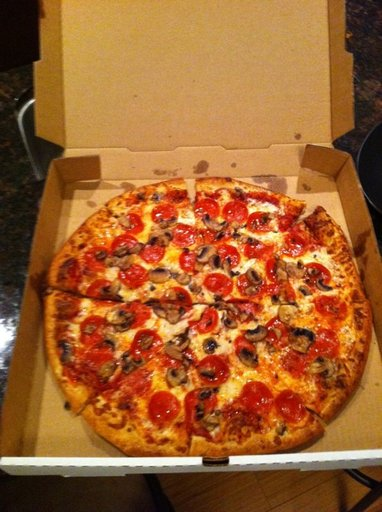

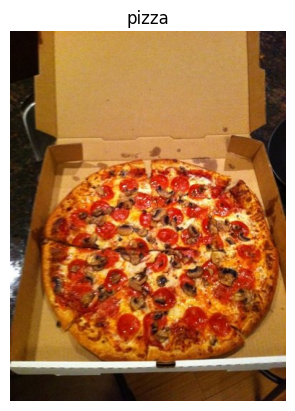

In [ ]:
# View a random image from the training dataset.
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")
img

In [ ]:
# View the image shape.
img.shape  # returns width, height, colour channels.

(512, 382, 3)

In [ ]:
 # Get all the pixel values between 0 and 1.
 img/255.

array([[[0.0627451 , 0.02352941, 0.01960784],
        [0.05882353, 0.01960784, 0.01568627],
        [0.05490196, 0.01568627, 0.01176471],
        ...,
        [0.08627451, 0.0627451 , 0.07843137],
        [0.09019608, 0.06666667, 0.08235294],
        [0.09019608, 0.06666667, 0.08235294]],

       [[0.06666667, 0.02745098, 0.02352941],
        [0.0627451 , 0.02352941, 0.01960784],
        [0.05882353, 0.01960784, 0.01568627],
        ...,
        [0.08627451, 0.0627451 , 0.07843137],
        [0.08235294, 0.05882353, 0.0745098 ],
        [0.07843137, 0.05490196, 0.07058824]],

       [[0.05882353, 0.01960784, 0.01568627],
        [0.05490196, 0.01568627, 0.01176471],
        [0.05490196, 0.01568627, 0.01176471],
        ...,
        [0.10980392, 0.0745098 , 0.09411765],
        [0.09019608, 0.06666667, 0.0745098 ],
        [0.08235294, 0.05882353, 0.06666667]],

       ...,

       [[0.0627451 , 0.04313725, 0.03137255],
        [0.05882353, 0.03921569, 0.02745098],
        [0.05882353, 0

 **Note** Machine Learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **Scale** (Also known as **Normalize** ) their pixel values by dividing the image arrays by 255. (Since 255 is the maximum pixel value).

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images.
* Build a CNN to find patterns in our images.
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed.
tf.random.set_seed(42)

# Preprocess data (Get all of the pixel values between 0 & 1, Also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our directories.
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches.
train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary',
    seed = 42
)

valid_data = valid_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (224, 224),
    class_mode = "binary",
    seed = 42
)


# Build a CNN model same as the tiny VGG (same as the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile our CNN
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model.
history_1 = model_1.fit(
    train_data,   # The labels and data get created for us when we use flow_from_directory. i.e the X and Y.
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
  )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 318ms/step - accuracy: 0.6540 - loss: 0.6020 - val_accuracy: 0.6640 - val_loss: 0.6742
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - accuracy: 0.7258 - loss: 0.5549 - val_accuracy: 0.8620 - val_loss: 0.3400
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8303 - loss: 0.4037 - val_accuracy: 0.8080 - val_loss: 0.3955
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.8344 - loss: 0.3829 - val_accuracy: 0.8720 - val_loss: 0.3023
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.8267 - loss: 0.3851 - val_accuracy: 0.8540 - val_loss: 0.3606


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model.
model_2.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


# Fit the model.
history_2 = model_2.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.4733 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.4944 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.5054 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.4729 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.4968 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [ ]:
# Get model_2 summary
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parameters than our CNN (model_1), let's improve it...

In [ ]:
# Set the random_seeed.
tf.random.set_seed(42)

# Create the model same as model but with more layers.
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model_3
model_3.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


# Fit the model.
history_3 = model_3.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - accuracy: 0.6431 - loss: 4.8162 - val_accuracy: 0.7700 - val_loss: 0.6223
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.7630 - loss: 0.5964 - val_accuracy: 0.7660 - val_loss: 0.6208
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.7172 - loss: 0.8766 - val_accuracy: 0.7720 - val_loss: 0.6308
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.6839 - loss: 1.0829 - val_accuracy: 0.7520 - val_loss: 0.6047
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.7678 - loss: 0.5669 - val_accuracy: 0.7380 - val_loss: 0.7868


In [ ]:
  # Get a summary of model_3.
  model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

**Note:** You can think of trainable parameters as **patterns a model can learn from data**.

## Binary Classification: Let's break it down.

1. Become one with the data(visualize, visualize, visualize)
2. Preprocess the data (prepare it for our model, the main step here is scaling/Normalization)
3. Create a model (start with the baseline)
4. Fit the model.
5. Evaluate the model.
6. Adjust different parameters and adjust the model (Here we try to beat the baseline).
7. Repeat untill satisfied (experiment, experiment, experiment).

## 1. Become one with the data

Image shape: (384, 512, 3)
Image shape: (512, 384, 3)


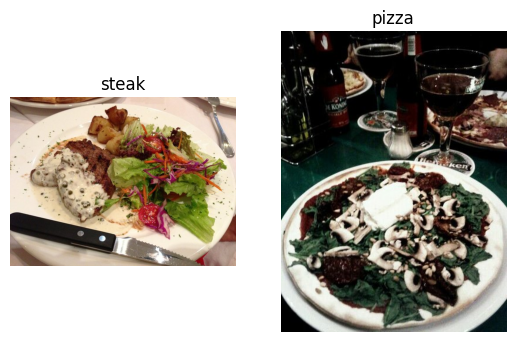

In [ ]:
# Visualize data.
plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image(target_dir="pizza_steak/train/",
                                 target_class="steak")
plt.subplot(1,2,2)
pizza_image = view_random_image(target_dir="pizza_steak/train/",
                                target_class="pizza")

### 2. Preprocess the data (prepare it for a model).

In [ ]:
# Define the directory dataset paths.

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of the data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.  

It does this for a couple of reasons.
1. 10,000 images(or more) might not fit into the memoery of our processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32 ?.
Because 32 is good for your health...

In [ ]:
# Create train and test data generators and rescale the data.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:

# Load in our image data from directories and turn them into batches.
train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "binary",
    seed = 42
)

test_data = test_datagen.flow_from_directory(
    directory = test_dir,
    target_size=(224,224),
    batch_size = 32,
    class_mode = "binary",
    seed = 42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch.
images, labels = next(train_data)   # Get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first two images.

images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [ ]:
images[7].shape

(224, 224, 3)

## Create a CNN model (Start with a baseline)

A baseline is reletively a simple model or existing result that you setup when beginning a Machine Learning experiment, you try to beat the baseline.

> **Note** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required(e.g look at which current model is performing best in the field of your problem).

In [ ]:
# Make the creating of our model a little easier.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer Convolutional neural network).
model_4 = Sequential([
    Conv2D(filters=10,   # Filters is the number of sliding windows going across an input(higher lead to complex model)
           kernel_size=8,  # Size of the sliding window going across the input.
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)
           ),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")   # output layer(working with binary classification so only 1 output neuron).
])


# Compile the model.
model_4.compile(
    loss="binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics =["accuracy"]
)

# Fit the model.
model_4_history = model_4.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 233ms/step - accuracy: 0.5845 - loss: 2.5358 - val_accuracy: 0.7900 - val_loss: 0.4779
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.7782 - loss: 0.4870 - val_accuracy: 0.8140 - val_loss: 0.4228
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.8033 - loss: 0.4508 - val_accuracy: 0.8300 - val_loss: 0.3816
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8182 - loss: 0.4097 - val_accuracy: 0.8000 - val_loss: 0.4205
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.8551 - loss: 0.3659 - val_accuracy: 0.8360 - val_loss: 0.3840


### 5. Evaluating our model
it looks like our model is learning something, let's evaluate it.

<Axes: >

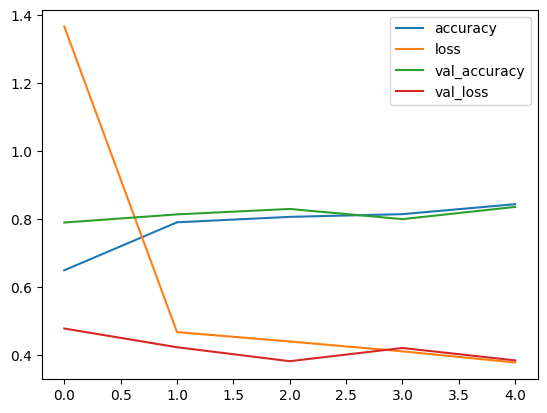

In [ ]:
import pandas as pd
pd.DataFrame(model_4_history.history).plot()

In [ ]:
model_4_history.history

{'accuracy': [0.6493333578109741,
  0.7906666398048401,
  0.8066666722297668,
  0.8146666884422302,
  0.843999981880188],
 'loss': [1.3674160242080688,
  0.4672751724720001,
  0.43973398208618164,
  0.4106409549713135,
  0.3778461813926697],
 'val_accuracy': [0.7900000214576721,
  0.8140000104904175,
  0.8299999833106995,
  0.800000011920929,
  0.8360000252723694],
 'val_loss': [0.4778801500797272,
  0.4227657914161682,
  0.3816169500350952,
  0.4205312430858612,
  0.3840298056602478]}

In [ ]:
# Plot the validation and training curves seperately.
def plot_loss_curves(history):
  """
    Return seperate loss curves for training and validation matrics..
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  # Plot accuracy.
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

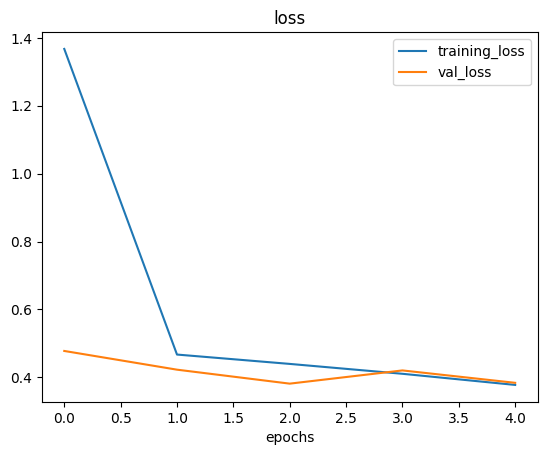

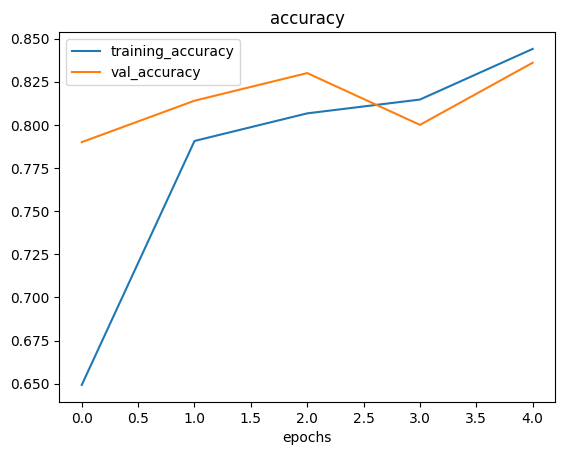

In [ ]:
# Plot loss curves.
plot_loss_curves(model_4_history)

 ### 6. Adjust the model parameters.

 Fitting a machine learning model comes in 3 steps:

 0. Create a baseline.
 1. Beat the baseline overfitting a larger model.
 2. Reduce overfitting.

 Ways to reduce overfitting....

* Increase the number of conv layers.
* Increase the number of conv filters
* Add another dense layer to the output of our flattend layer

Reduce:
* Add data augmentation.
* Add regulairization alyers (such as MaxPool2D)
* Add more data...

In [ ]:
# Create the model (this is going to be our new baseline).

model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D (pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


# Compile the model.
model_5.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)


# Fit the model
model_5_history = model_5.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.5693 - loss: 0.6824 - val_accuracy: 0.7740 - val_loss: 0.5005
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.7404 - loss: 0.5354 - val_accuracy: 0.8380 - val_loss: 0.4508
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.7823 - loss: 0.4714 - val_accuracy: 0.8340 - val_loss: 0.3850
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.8137 - loss: 0.4222 - val_accuracy: 0.8640 - val_loss: 0.3590
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.8142 - loss: 0.4177 - val_accuracy: 0.8520 - val_loss: 0.3744


In [ ]:
# Get a summary of our model.
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

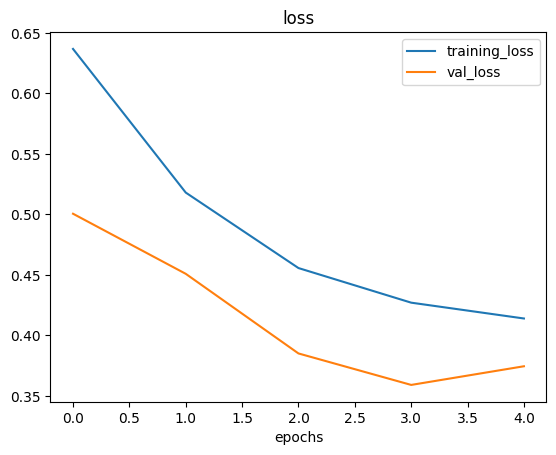

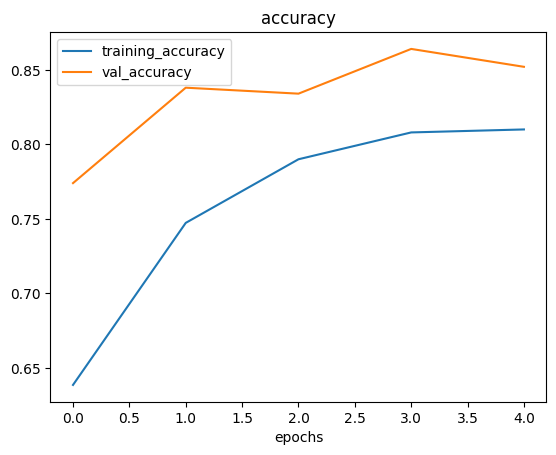

In [ ]:
# Plot loss curves.
plot_loss_curves(model_5_history)

 **Opening our bag of tricks and finding data augmentation**

In [ ]:
# Create ImageDataGenerator training instance with data augmentation.

train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2,  # How much we want to rotate for an image.
    shear_range = 0.2,  # How much we want to shear an image.
    zoom_range = 0.2,
    width_shift_range = 0.2,  # Move our image around the x-axis
    height_shift_range = 0.2,  # Move an image around the y-axis.
    horizontal_flip = True   # Denote wether we want to flip an image or not.
    )


# Create ImageDataGenerator without data augmentation.
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenenerator without data augmentation for the test dataset.
test_datagen = ImageDataGenerator(rescale=1/255.)



**Question:** What is data augmentation ?.

Data augmentation is the process of altering our training data, leading it to have diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [ ]:
train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)

# Import data and augment it from training directory.
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary",
    seed = 42,
    shuffle = False
)

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary",
    shuffle = False
)

# Create non-augmented test data batches.
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary"
)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> **Note** Data augmenteation is usually only performed on the training data. Using 'ImageDataGenerator' built-in data augmentation parameters our images are left as they are in the directory but are modified as they're loaded into the model.

Finally... Let's visualize some augmented data!!!

In [ ]:
# Get sample data batches.
images, labels = next(train_data)   # note: labels aren't augmented only data.
augmented_images, augmented_labels = next(train_data_augmented)

showing image number: 13


(-0.5, 223.5, 223.5, -0.5)

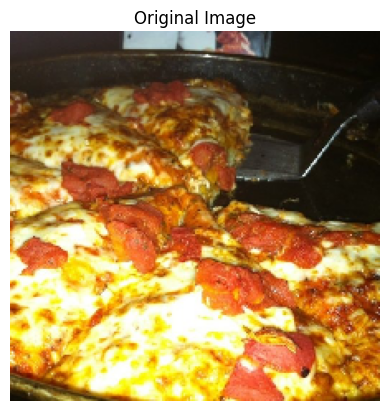

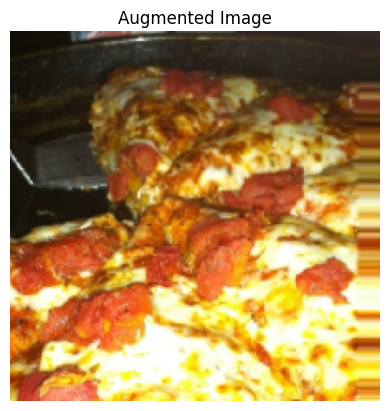

In [ ]:
# Show original image and augmented image.
import random
random_number = random.randint(0, 32)   # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])



plt.title(f"Augmented Image")
plt.axis(False)

## Model 6. Same as model 5 but with Data Augmentation.

In [ ]:
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile our model.
model_6.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model.
model_6_history = model_6.fit(
    train_data_augmented,    # Fitting model_6 on augmented training data
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 426ms/step - accuracy: 0.4792 - loss: 0.7202 - val_accuracy: 0.4980 - val_loss: 0.6925
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 391ms/step - accuracy: 0.4859 - loss: 0.6941 - val_accuracy: 0.5560 - val_loss: 0.6930
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 411ms/step - accuracy: 0.4863 - loss: 0.6932 - val_accuracy: 0.5080 - val_loss: 0.6929
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 407ms/step - accuracy: 0.5245 - loss: 0.6931 - val_accuracy: 0.5820 - val_loss: 0.6928
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 403ms/step - accuracy: 0.5449 - loss: 0.6931 - val_accuracy: 0.6320 - val_loss: 0.6919


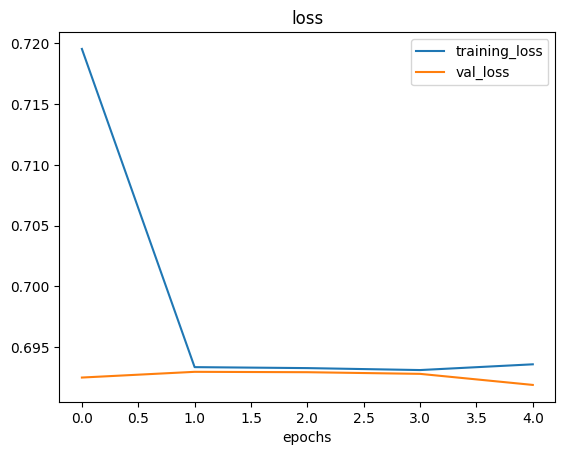

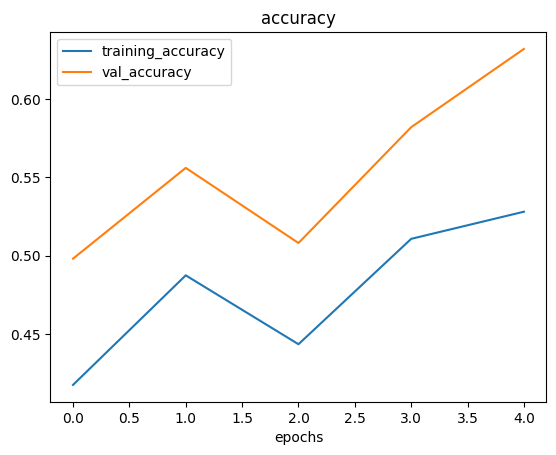

In [ ]:
# Plotting loss curves.
plot_loss_curves(model_6_history)

### Model 7: Training our model with Suffle=True and data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)

# Import data and augment it from training directory.
print("Augmented training data")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary",
    seed = 42,
    shuffle = True
)

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data_shuffled = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary",
    shuffle = True
)

# Create non-augmented test data batches.
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary"
)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
# Build the model.
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")   # We use sigmoid b/c we are dealing with binary classification...
])


# Compile th emodel.
model_7.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

# Fit the model.
model_7_history = model_7.fit(
    train_data_augmented_shuffled,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented_shuffled),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 430ms/step - accuracy: 0.5152 - loss: 0.6952 - val_accuracy: 0.7760 - val_loss: 0.5627
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 417ms/step - accuracy: 0.6975 - loss: 0.5822 - val_accuracy: 0.8300 - val_loss: 0.4029
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 401ms/step - accuracy: 0.7417 - loss: 0.5476 - val_accuracy: 0.7580 - val_loss: 0.5064
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 392ms/step - accuracy: 0.7788 - loss: 0.5213 - val_accuracy: 0.7800 - val_loss: 0.4702
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 413ms/step - accuracy: 0.7765 - loss: 0.4962 - val_accuracy: 0.8520 - val_loss: 0.3506


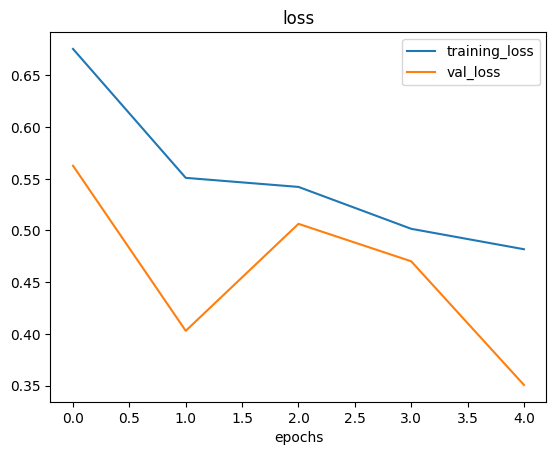

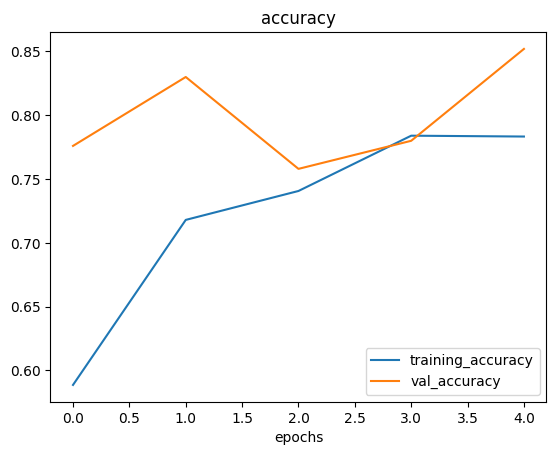

In [ ]:
# plot loss curves.
plot_loss_curves(model_7_history)

## 7. Repeat until satisfied.

Since we've alrady beaten our baseline, there are a few things we could try to continue to improve out model:

* Increase the number of model layers (e.g add more 'Conv2D'/ 'MaxPool2D' layers)
* Increase the number of filters in each convolutional layer. (e.g from 10 to 32 or even 64)
* We could train for longer (more epochs)......
* Find the ideal learning rate
* Get more data.
* Use **Transfer learning**   using the features another image model has learn and use it for our own use case.

In [ ]:
## Making a prediction with our trained model on our own custom data

print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.image as mping

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mping.imread("03-steak.jpeg")


--2025-02-11 03:17:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2025-02-11 03:17:33 (41.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



**Note** When you train a neural network and you want to make predictions with it on your own custom data, it's important that your custom data (or new data) is proprocessed into the same format as the data your model was train on.

In [ ]:
# Create a function to import and image and resize it to be able to use with our model.
def load_and_prep_image(filename, img_shape=224):
  """
    Read an image from filename, turns it into tensor and reshape it to (img_shape, img_shape, color_channels).
  """
  # Read in the image.
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor.
  img = tf.image.decode_image(img)
  # Resize the image.
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image and get values into 0 and 1
  img = img/255.
  return img

In [ ]:
# check the shape of our image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


array([[0.8570799]], dtype=float32)

Looks like our custom image is being put through our model, howver, it currently outputs a prediction prob. Let's visuzlize the image as well as the model's prediction

In [ ]:
# We can index the predicted class by rounding the prediction prob.

pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
    Import and image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # import the target image and preprocess it.
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class.
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class.
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


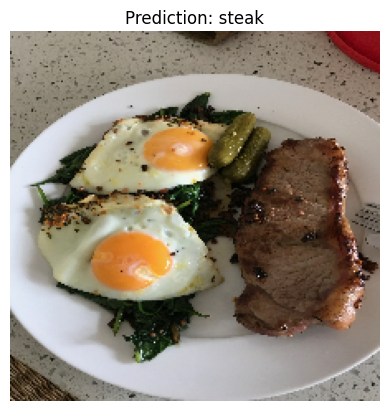

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image

--2025-02-11 03:17:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.04s   

2025-02-11 03:17:35 (39.7 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


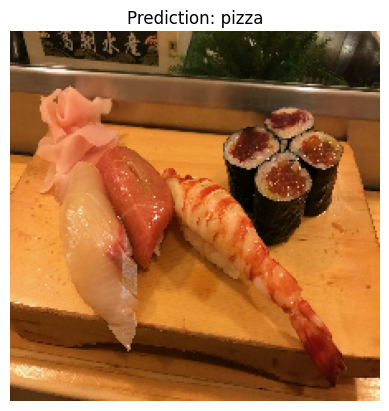

In [ ]:
# Download another test custom image and make predictions on it.
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
pred_and_plot(model_7, "03-sushi.jpeg")

--2025-02-11 03:17:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.06s   

2025-02-11 03:17:36 (53.6 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


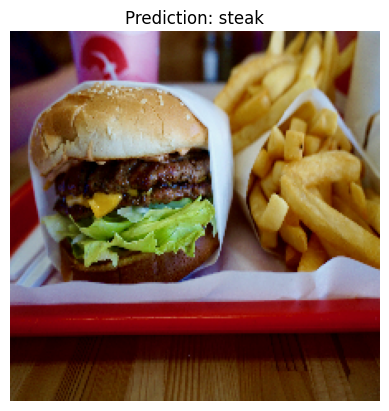

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
pred_and_plot(model_7, "03-hamburger.jpeg")

# Multi-class Image Classification

1. Become one with the data.
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (Overfit it to make sure it works)

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data.
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-02-11 03:17:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  21.2MB/s    in 8.2s    

2025-02-11 03:17:45 (60.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data.
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} in {dirpath} ")

There are 2 directories and 0 in 10_food_classes_all_data 
There are 10 directories and 0 in 10_food_classes_all_data/test 
There are 0 directories and 250 in 10_food_classes_all_data/test/ramen 
There are 0 directories and 250 in 10_food_classes_all_data/test/sushi 
There are 0 directories and 250 in 10_food_classes_all_data/test/ice_cream 
There are 0 directories and 250 in 10_food_classes_all_data/test/pizza 
There are 0 directories and 250 in 10_food_classes_all_data/test/chicken_wings 
There are 0 directories and 250 in 10_food_classes_all_data/test/hamburger 
There are 0 directories and 250 in 10_food_classes_all_data/test/grilled_salmon 
There are 0 directories and 250 in 10_food_classes_all_data/test/fried_rice 
There are 0 directories and 250 in 10_food_classes_all_data/test/chicken_curry 
There are 0 directories and 250 in 10_food_classes_all_data/test/steak 
There are 10 directories and 0 in 10_food_classes_all_data/train 
There are 0 directories and 750 in 10_food_classes_a

In [ ]:
# Setup the train and test directories.

train_dir = "/content/10_food_classes_all_data/train/"
test_dir = "/content/10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names.
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 384, 3)


array([[[ 35,  12,   6],
        [ 35,  12,   6],
        [ 36,  13,   5],
        ...,
        [  1,   3,   0],
        [  0,   2,   0],
        [  0,   1,   0]],

       [[ 36,  13,   7],
        [ 36,  13,   7],
        [ 36,  13,   5],
        ...,
        [  0,   1,   0],
        [  1,   3,   0],
        [  2,   4,   1]],

       [[ 36,  13,   7],
        [ 36,  13,   7],
        [ 36,  13,   5],
        ...,
        [  0,   0,   0],
        [  3,   3,   1],
        [  5,   5,   3]],

       ...,

       [[109,  70,  65],
        [105,  66,  61],
        [103,  64,  59],
        ...,
        [135, 103,  90],
        [127,  95,  82],
        [115,  83,  70]],

       [[105,  66,  61],
        [104,  65,  60],
        [102,  63,  58],
        ...,
        [134, 102,  89],
        [134, 102,  89],
        [122,  90,  77]],

       [[ 99,  60,  55],
        [102,  63,  58],
        [103,  64,  59],
        ...,
        [132, 100,  87],
        [139, 107,  94],
        [128,  96,  83]]], dtype=uint8)
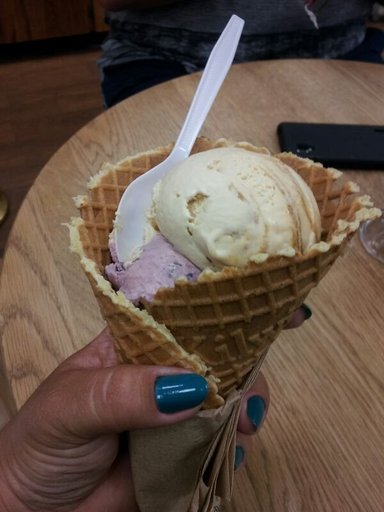

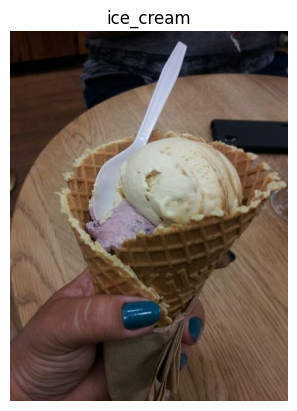

In [ ]:
# Visualize, visualize, visualize.

import random
img = view_random_image(
    target_dir = train_dir,
    target_class = random.choice(class_names)
)

img


In [ ]:
## 2. Preproccess the data (prepare it for the model).

In [ ]:
# Create train and test data generators and rescale the data.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:

# Load in our image data from directories and turn them into batches.
train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "categorical",    # Since we are dealing with multi-class.
    seed = 42
)

test_data = test_datagen.flow_from_directory(
    directory = test_dir,
    target_size=(224,224),
    batch_size = 32,
    class_mode = "categorical",
    seed = 42
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
import tensorflow.keras.models as Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten, Dense


# Create the model.
model_8 = tf.keras.models.Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")   # Since we are working with multiclass classfication not binary
])


# Compile the model.
model_8.compile(
loss=tf.keras.losses.CategoricalCrossentropy(),
optimizer = tf.keras.optimizers.Adam(),
metrics = ["accuracy"]
)


# Fit the model.
model_8_history = model_8.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 123ms/step - accuracy: 0.1568 - loss: 2.2573 - val_accuracy: 0.2512 - val_loss: 2.0874
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 115ms/step - accuracy: 0.3145 - loss: 1.9567 - val_accuracy: 0.3044 - val_loss: 1.9640
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 109ms/step - accuracy: 0.3811 - loss: 1.8148 - val_accuracy: 0.3024 - val_loss: 1.9600
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.5171 - loss: 1.4499 - val_accuracy: 0.3356 - val_loss: 1.9756
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 113ms/step - accuracy: 0.7362 - loss: 0.8148 - val_accuracy: 0.3168 - val_loss: 2.4788


In [ ]:
model_8.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

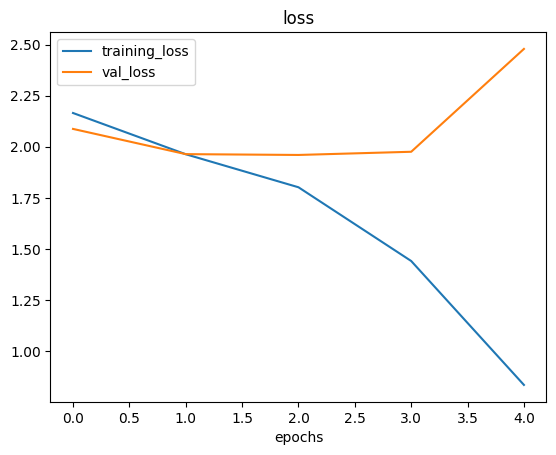

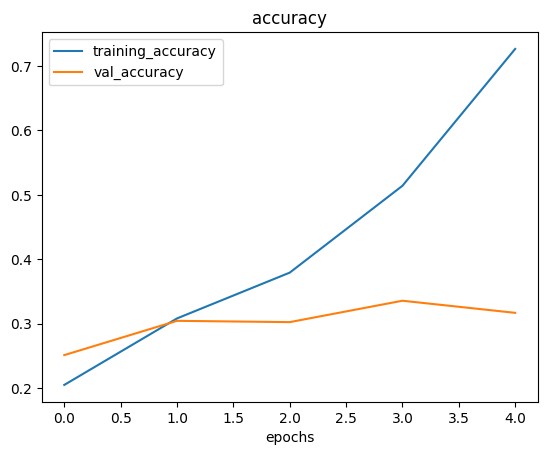

In [ ]:
# Plot loss curves.
plot_loss_curves(model_8_history)

In [ ]:
# Evaluating our model on the test data.
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.3130 - loss: 2.4873


[2.4788124561309814, 0.31679999828338623]

Well!
From our lost curves our model is overfitting.
Since it learn the training data very well but perform very poor on our test data.

### 6. Adjust the model hyperameters (to beat the baseline and also reduce overfitting)


Due to its performance on the training data, it's clear our model is learning something....

However, it's not generalizing well to unseen data(overfitting).

So, let's try to fix overfitting by...

- **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
- **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model. One way to simplify our model is reduce number of layer(Hidden units in layers).
- **Use Data Augmentation** - helps increase the diversity of our dataset without altering our dataset.
- **Use transfer learning** - Learn the patterns another model has learn so we can use them to improve our model.

In [ ]:
# Let's try to simplidfy the model first.
# Let's try to remove 2 Convolutional layer...

model_9 = tf.keras.models.Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model.
model_9.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit our model.
model_9_history = model_9.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 114ms/step - accuracy: 0.1878 - loss: 2.2470 - val_accuracy: 0.3108 - val_loss: 1.9612
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 102ms/step - accuracy: 0.3845 - loss: 1.7951 - val_accuracy: 0.3560 - val_loss: 1.8566
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - accuracy: 0.5261 - loss: 1.4649 - val_accuracy: 0.3392 - val_loss: 1.9372
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.7072 - loss: 0.9846 - val_accuracy: 0.3452 - val_loss: 2.0839
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.8538 - loss: 0.5434 - val_accuracy: 0.3280 - val_loss: 2.4868


In [ ]:
# evaluate the model.
model_9.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.3333 - loss: 2.4499


[2.4867942333221436, 0.328000009059906]

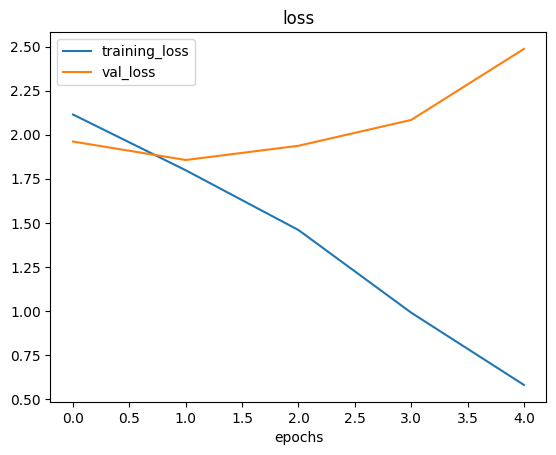

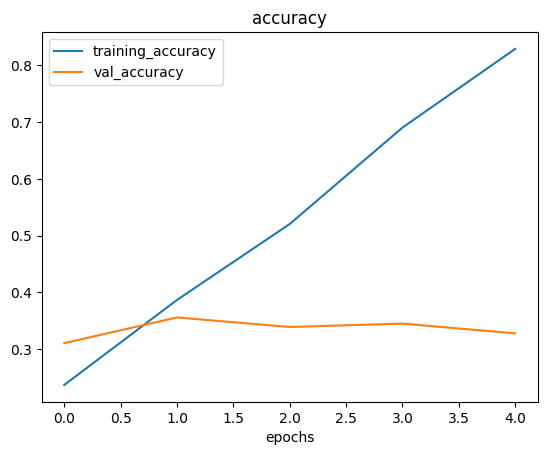

In [ ]:
# plot loss curves.
plot_loss_curves(model_9_history)

Well reducing the number of hidden units(layers) have not improve our model yet....

Let's move on and augment our data..

Idealling, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2,  # How much we want to rotate for an image.
    shear_range = 0.2,  # How much we want to shear an image.
    zoom_range = 0.2,
    width_shift_range = 0.2,  # Move our image around the x-axis
    height_shift_range = 0.2,  # Move an image around the y-axis.
    horizontal_flip = True   # Denote wether we want to flip an image or not.
    )



train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "categorical",
    seed = 42,
    shuffle = True
)


Found 7500 images belonging to 10 classes.


In [ ]:
model_10 = tf.keras.models.Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model.
model_10.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit our model.
model_10_history = model_10.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 97s 403ms/step - accuracy: 0.1249 - loss: 2.4952 - val_accuracy: 0.1888 - val_loss: 2.1976
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 399ms/step - accuracy: 0.1938 - loss: 2.1844 - val_accuracy: 0.3012 - val_loss: 2.0094
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 93s 395ms/step - accuracy: 0.2585 - loss: 2.0878 - val_accuracy: 0.3252 - val_loss: 1.9565
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 399ms/step - accuracy: 0.2884 - loss: 2.0372 - val_accuracy: 0.3028 - val_loss: 1.9387
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 94s 398ms/step - accuracy: 0.3163 - loss: 2.0005 - val_accuracy: 0.3440 - val_loss: 1.8806


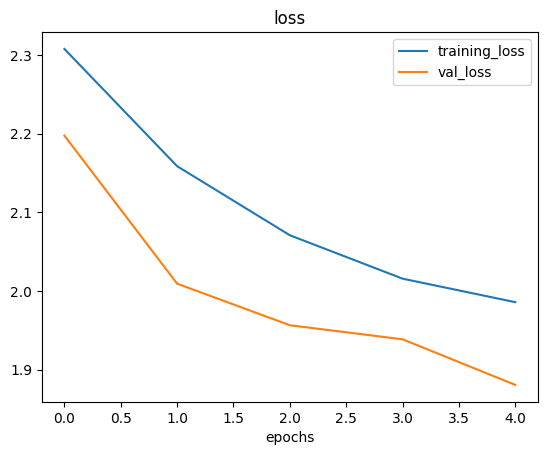

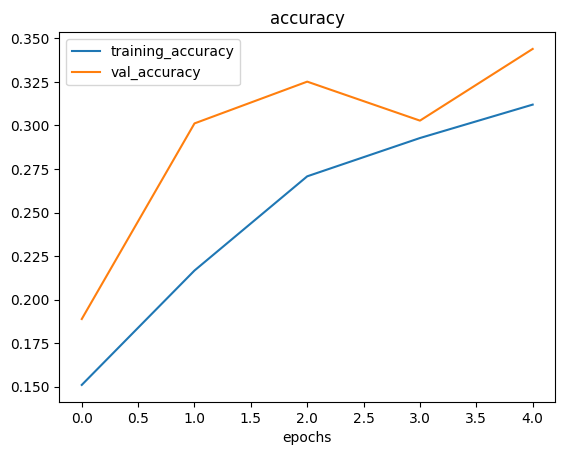

In [ ]:
# Plot loss curves.
plot_loss_curves(model_10_history)

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images.

def pred_and_plot(model, filename, class_names=class_names):
  """
    Import and image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # import the target image and preprocess it.
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred.
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]
  # Plot the image and predicted class.
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


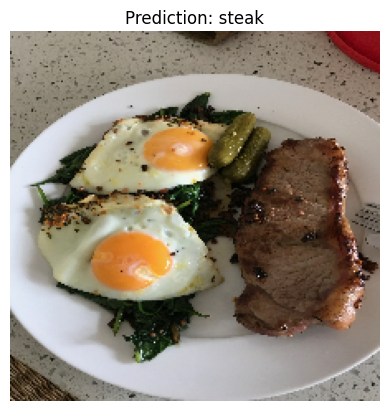

In [ ]:
# make prediction.
pred_and_plot(model_10,
              "03-steak.jpeg"
              )

Looks like our model didn't perform well on our custom images but this because it only achieve a low accuracy...

i'll improve this model by using Transfer Learning.

## Saving and loading our model

In [ ]:
model_10.save("saved_trained_model_10.keras")

In [ ]:
# Load in a trained model and evaluate it.
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10.keras")
loaded_model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.3458 - loss: 1.8732


[1.8806347846984863, 0.3440000116825104]

In [ ]:
# Compare our loaded model with our existing model.
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.3346 - loss: 1.9028


[1.8806349039077759, 0.3440000116825104]

# Transfer Learning with TensorFlow Part 1: Feature Extraction.

Transfer learning is leveraging a working model's existing architecture and learned patterns.

There ar two main benefits:
1. Can leverage an existing neural network architecture proven to work on problems similar to our own.
2. Can leverage a working neural network architecture which has already learned patterns on similar data to our own, then we can adapt those patterns to our own data.

In [ ]:
# Get our data.
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file.
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2025-02-11 06:09:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  22.7MB/s    in 8.1s    

2025-02-11 06:09:45 (19.8 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
# walk through the directory. To know the number of images in each folder

import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_10_percent
There are 10 directories and 0 images in 10_food_classes_10_percent/test
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ramen
There are 0 directories and 250 images in 10_food_classes_10_percent/test/sushi
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_10_percent/test/pizza
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_10_percent/test/hamburger
There are 0 directories and 250 images in 10_food_classes_10_percent/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_10_percent/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_10_percent/test/steak
There are 10 directori

### create data loaders (preparing the data)

We'll use the ImageDataGenerator to load in the mage in batches

In [ ]:
# Setup data inputs.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(
    rescale=1/225.,
    rotation_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    )

test_data = ImageDataGenerator(
  rescale = 1/255.
)


train_data_10_percent = train_datagen.flow_from_directory(
    train_dir,
    target_size = IMAGE_SHAPE,
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    shuffle = True
)

test_data = test_data.flow_from_directory(
    test_dir,
    target_size = IMAGE_SHAPE,
    batch_size = BATCH_SIZE,
    class_mode = "categorical"
)

print(f"There are {len(train_data_10_percent)} batches in train data")
print(f"There are {len(test_data)} batches in test data")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
There are 24 batches in train data
There are 79 batches in test data


## Setting up callbacks (Things to run while our model trains)  

callbacks are extra functionality you can add to your models to be performed during or after training

Some of the most popular callbacks are.
* Tracking experiments with tensorboardcallback.
* Model checkpoints with the ModelCheckpoint callback
* Stopping the model from training before it has fully converged with earlystoppingcallback.

In [ ]:
# Create TensorBoard callback.
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir = log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## Creating models using TensorFlow Hub

In the past we've used TensorFlow to create our own models layer by layer from scratch.

So now we're going to do a similar process, except the majority of our model's layers are going to come from TensorFlow Hub.

We can access pretrained models on https://tfhub.dev/


Browsing the TensorFlow Hub page and sorting for image classfication, we found the following features vector modl: https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB1


In [ ]:
# Let's compare the following two models.
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/classification/1"

In [ ]:
# import dependencies.
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
# Let's makes  a create_model() function to create a model from a URL.

def create_model(model_url, num_classes=10):
  """
  Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
    should be equal to number of target clases, default=10.

    """
  # Download the pretrained model and save it as a Keras layer.
  feature_extractor_layer = hub.KerasLayer(
      model_url,
      trainable = False,   # Freeze the already learned patterns.
      name = "feature_extraction_layer",
      input_shape = IMAGE_SHAPE + (3,)
      )

  # Create our own model.
  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])

  return model

In [ ]:
# Call the model.
resnet_model = create_model(resnet_url,
  num_classes=train_data_10_percent.num_classes)
resnet_model

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x79e2b6a854d0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)